In [64]:
# Santander Kaggle
# Rush basic solution!

import re, operator
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import cross_validation
from sklearn.cross_validation import KFold
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler

In [65]:
# Getting Started With Kaggle
santander_train = pd.read_csv("train.csv")
# santander_test = pd.read_csv("test.csv")
# santander_full = pd.concat([santander_train, santander_test])
data = santander_train


In [66]:
#SEPARATE ID, TARGET and PREDICTOR COLUMNS
num_rows,num_cols = data.shape

print("rows = ",num_rows,";  columns = ", num_cols)
column_headers = list(data.columns.values)

id_col = column_headers[0] # id first position
print("ID column is ",id_col)

target_col = column_headers[-1] # target last position
print("Target column is ",target_col)

predictor_cols = column_headers[1:-1] # everything else
if len(predictor_cols)<10:
    print("Predictor columsn are ",predictor(cols))
    

rows =  76020 ;  columns =  371
ID column is  ID
Target column is  TARGET


In [67]:
# EXCEPTIONAL VALUES
# extreme values/values that look like special codes
# data.apply(pd.Series.value_counts)
# -999999
# +999999999
# data.isnull().sum().sum()
# non NaNs

In [68]:
# go through all columns
# look for -999999
num = 0
for col in predictor_cols:
    if any(data[col] == -999999):
        num += sum(data[col] == -999999)
        print(col)
        print(data[col].value_counts())
        #data[col].hist(bins=100)
        
print("Looking for -999999, found ",num)

var3
 2         74165
 8           138
-999999      116
 9           110
 3           108
 1           105
 13           98
 7            97
 4            86
 12           85
 6            82
 0            75
 10           72
 11           66
 5            63
 14           61
 15           34
 18           10
 16            9
 17            7
 23            7
 25            6
 142           6
 154           6
 20            6
 31            6
 38            6
 153           5
 24            5
 91            5
           ...  
 225           1
 169           1
 41            1
 228           1
 101           1
 165           1
 229           1
 168           1
 108           1
 238           1
 184           1
 112           1
 76            1
 77            1
 205           1
 119           1
 79            1
 182           1
 181           1
 210           1
 40            1
 211           1
 84            1
 213           1
 178           1
 177           1
 87            1
 151     

In [69]:
# go through all columns
# look for 9999999999
num = 0
for col in predictor_cols:
    #print(col)
    if any(data[col] == 9999999999):
        num += sum(data[col] == 9999999999)
        print(col)
        print(data[col].value_counts())
        #data[col].hist(bins=100)
        
print("Looking for 9999999999, found ",num)

delta_imp_amort_var18_1y3
0             76018
9999999999        2
Name: delta_imp_amort_var18_1y3, dtype: int64
delta_imp_amort_var34_1y3
0             76018
9999999999        2
Name: delta_imp_amort_var34_1y3, dtype: int64
delta_imp_aport_var13_1y3
 0.000000e+00    73948
-1.000000e+00     1675
 1.000000e+10      370
 4.000000e+00        2
-5.000000e-01        2
-3.333333e-01        2
 1.538462e-01        1
-9.038462e-01        1
 1.605039e-01        1
-2.910826e-01        1
 5.500000e+00        1
 1.000000e+00        1
-3.494898e-01        1
 1.777778e+00        1
 1.181818e+00        1
 2.333092e+00        1
-8.000000e-01        1
 4.000000e-01        1
-4.995000e-01        1
-8.333333e-01        1
 1.222222e+00        1
-9.090909e-02        1
-6.666667e-01        1
-1.973684e-01        1
 1.445714e+00        1
-1.000000e-01        1
-7.602877e-01        1
Name: delta_imp_aport_var13_1y3, dtype: int64
delta_imp_aport_var17_1y3
 0.000000e+00    75960
 1.000000e+10       39
-1.000000e+

In [70]:
data.replace('-999999', np.nan)
data.replace('9999999999', np.nan)
print(data.shape)
descr = pd.concat( [pd.DataFrame( len(data) - data.count() ), data.apply(pd.Series.nunique).to_frame(), data.dtypes.to_frame() ],axis=1 )
descr.columns = ["Missing Values?","How many unique values","Column data types"]
print(descr)

for col in data.columns:
    num_unique = pd.Series.nunique(data[col])

    if num_unique<=10:
        print( '{0!s:10s} {1!s:20s}'.format( col, (dict(data[col].value_counts())) ) )
    elif data[col].dtype=="int64" or data[col].dtype=="float64":
        print( '{0!s:10s} {1!s:20s}'.format( col, {k:round(float(v),2) for k,v in data[col].describe().to_dict().items()} ) )
    else:
        print( '{0!s:10s} {1!s:20s}'.format( col, "lots of text") )


(76020, 371)
                               Missing Values?  How many unique values  \
ID                                           0                   76020   
var3                                         0                     208   
var15                                        0                     100   
imp_ent_var16_ult1                           0                     596   
imp_op_var39_comer_ult1                      0                    7551   
imp_op_var39_comer_ult3                      0                    9099   
imp_op_var40_comer_ult1                      0                     293   
imp_op_var40_comer_ult3                      0                     346   
imp_op_var40_efect_ult1                      0                      23   
imp_op_var40_efect_ult3                      0                      29   
imp_op_var40_ult1                            0                     224   
imp_op_var41_comer_ult1                      0                    7421   
imp_op_var41_comer_ult3  

In [72]:
# REMOVE ZERO VARIANCE COLUMNS

all_zero_columns = list(data.columns[data.apply(lambda x: np.var(x.dropna())==0)].values)
# ASSUMPTION - ID and TARGET are not zero variance columns!
#all_zero_column_labels = data.columns[all_zero_columns].values
#all_zero_columns
print( "Removed "+str(len(all_zero_columns))+" zero variance columns, from "+str(len(predictor_cols))+" predictor columns")
predictor_cols = list(np.setdiff1d(predictor_cols, all_zero_columns))

Removed 34 zero variance columns, from 335 predictor columns


In [78]:
# REMOVE DUPLICATE COLUMNS
# and ignore rows where either element is NA!

remove = []
#cols = train.columns # predictor_cols
duplicated = dict()
for col1 in range( len ( predictor_cols ) ):
    col1_name = predictor_cols[col1]
    col1_values = data[ col1_name ].values
    col1_na = np.isnan( col1_values )
    
    for col2 in range( col1+1 , len ( predictor_cols ) ):

        if col2 in remove:
            continue
            
        col2_name = predictor_cols[col2]
        col2_values = data[ col2_name ].values
        col2_na = np.isnan( col2_values )
        not_col1_and_col2_na = np.logical_not( np.logical_or(col1_na , col2_na) )
        
        if np.array_equal( col1_values[ not_col1_and_col2_na ] , col2_values[ not_col1_and_col2_na ] ):
            
            remove.append( col2_name )
            if col1_name in duplicated:
                duplicated[ col1_name ].append[ col2_name ]
            else:
                duplicated[ col1_name ] = [col2_name]
            
print(remove)
print(duplicated)
#train.drop(remove, axis=1, inplace=True)
#test.drop(remove, axis=1, inplace=True)
print( "Removed "+str( len(remove) )+" duplicate columns, from "+str( len(predictor_cols) )+" predictor columns")
predictor_cols = list(np.setdiff1d(predictor_cols, all_zero_columns))


# observation - duplicate data reflects paired datasets

['delta_num_reemb_var13_1y3', 'delta_num_reemb_var17_1y3', 'delta_num_reemb_var33_1y3', 'delta_num_trasp_var17_in_1y3', 'delta_num_trasp_var17_out_1y3', 'delta_num_trasp_var33_in_1y3', 'delta_num_trasp_var33_out_1y3', 'ind_var13_medio_0', 'ind_var18_0', 'ind_var25_0', 'ind_var26_0', 'ind_var6', 'ind_var6_0', 'ind_var32_0', 'ind_var34_0', 'ind_var37_0', 'ind_var40', 'num_var13_medio_0', 'num_var18_0', 'num_var25_0', 'num_var26_0', 'num_var6', 'num_var6_0', 'num_var32_0', 'num_var34_0', 'num_var37_0', 'num_var40', 'saldo_var13_medio', 'saldo_var6']
{'ind_var26': ['ind_var26_0'], 'num_var37': ['num_var37_0'], 'saldo_medio_var13_medio_ult1': ['saldo_var13_medio'], 'ind_var37': ['ind_var37_0'], 'ind_var29_0': ['ind_var6_0'], 'ind_var29': ['ind_var6'], 'num_var34': ['num_var34_0'], 'num_var13_medio': ['num_var13_medio_0'], 'ind_var25': ['ind_var25_0'], 'num_var25': ['num_var25_0'], 'ind_var32': ['ind_var32_0'], 'num_var29': ['num_var6'], 'num_var18': ['num_var18_0'], 'ind_var13_medio': ['ind

[True, False]

In [41]:
data['delta_imp_aport_var13_1y3'][76002]==9999999999
#data['delta_imp_aport_var13_1y3'].hist(bins=100, figsize=(15,15))

True

In [57]:
uniq, counts = np.unique(data.values, return_counts=True)
r,c = data.shape
size = r*c
print(size)
sorted_count_index = np.argsort(counts)[::-1]

for i in range(50):
    print( uniq[sorted_count_index[i]], counts[sorted_count_index[i]] , round(100* counts[sorted_count_index[i]]/size,2) )

28203420
0.0 25572164 90.67
3.0 887608 3.15
1.0 571714 2.03
2.0 164034 0.58
6.0 110073 0.39
9.0 49677 0.18
99.0 30538 0.11
12.0 29804 0.11
15.0 28992 0.1
90.0 28173 0.1
23.0 20178 0.07
30.0 17502 0.06
24.0 15618 0.06
18.0 15603 0.06
117310.979016 14868 0.05
60.0 12694 0.05
21.0 11973 0.04
27.0 10635 0.04
33.0 6850 0.02
150.0 6085 0.02
36.0 6057 0.02
39.0 5249 0.02
120.0 5158 0.02
42.0 4651 0.02
45.0 4550 0.02
300.0 4383 0.02
25.0 4224 0.01
-1.0 3474 0.01
48.0 3473 0.01
26.0 3274 0.01
51.0 2815 0.01
54.0 2444 0.01
57.0 2223 0.01
180.0 2220 0.01
600.0 2204 0.01
28.0 2177 0.01
900.0 2059 0.01
63.0 1850 0.01
31.0 1805 0.01
29.0 1731 0.01
240.0 1627 0.01
32.0 1595 0.01
66.0 1583 0.01
450.0 1575 0.01
2.88 1560 0.01
35.0 1538 0.01
2.61 1506 0.01
1500.0 1495 0.01
34.0 1492 0.01
75.0 1414 0.01


In [ ]:

data.hist(bins=100,figsize=(15,15))

In [76]:
data = santander_train
# removing first (ID) and last (TARGET) values
predictors = santander_train.columns.values[1:-1]


predictors = ['num_var34', 'num_var1', 'var3', 'saldo_var46', 'num_var5_0', 'ind_var5_0', 'num_var42_0', 'num_var30_0']

target = santander_train.columns.values[-1:]

data_target = data[target].as_matrix().ravel()

data[target]


,TARGET
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [74]:
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np

# The algorithms we want to ensemble.
# We're using the more linear predictors for the logistic regression, and everything with the gradient boosting classifier.
algorithms = [
    [GradientBoostingClassifier(random_state=1, n_estimators=25, max_depth=3), predictors ],
    [LogisticRegression(random_state=1), predictors ]
]

# Initialize the cross validation folds
kf = KFold( santander_train.shape[0], n_folds=3, random_state=1 )

predictions = []
for train, test in kf:
    train_target = dt.iloc[ train ]
    full_test_predictions = []
    # Make predictions for each algorithm on each fold
    for alg, predictors in algorithms:
        # Fit the algorithm on the training data.
        alg.fit(santander_train[ predictors ].iloc[ train,: ], train_target)
        # Select and predict on the test fold.  
        # The .astype(float) is necessary to convert the dataframe to all floats and avoid an sklearn error.
        test_predictions = alg.predict_proba(santander_train[ predictors ].iloc[ test,: ].astype(float))[ :,1 ]
        full_test_predictions.append( test_predictions )
    # Use a simple ensembling scheme -- just average the predictions to get the final classification.
    test_predictions = (full_test_predictions[0] + full_test_predictions[1]) / 2
    # Any value over .5 is assumed to be a 1 prediction, and below .5 is a 0 prediction.
    test_predictions[test_predictions <= .5] = 0
    test_predictions[test_predictions > .5] = 1
    predictions.append(test_predictions)

# Put all the predictions together into one array.
predictions = np.concatenate(predictions, axis=0)

# Compute accuracy by comparing to the training data.
accuracy = sum(predictions[ predictions == data_target ]) / len(predictions)
print(accuracy)

AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

In [18]:
alg = RandomForestClassifier(random_state=1, n_estimators=150, min_samples_split=4, min_samples_leaf=2)
scores = cross_validation.cross_val_score(alg, santander_train[predictors], santander_train[target], cv=3)
# Take the mean of the scores (because we have one for each fold)
print(scores.mean())

IndexError: too many indices for array

In [20]:
santander_train[predictors]

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
0,2,23,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000
1,2,34,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000
2,2,23,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000
3,2,37,0.0,195.00,195.00,0.00,0.00,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000
4,2,39,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016
5,2,23,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,87975.750000
6,2,27,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,94956.660000
7,2,26,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,251638.950000
8,2,45,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,101962.020000
9,2,25,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,356463.060000


C:\Anaconda3\envs\santander_kaggle\lib\site-packages\sklearn\utils\validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\envs\santander_kaggle\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [ 21  22  56  57  58  59  80  84  85 131 132 133 134 155 161 162 179 180
 189 192 220 222 234 238 244 248 261 262 303 307 315 319 327 349] are constant.
  UserWarning)


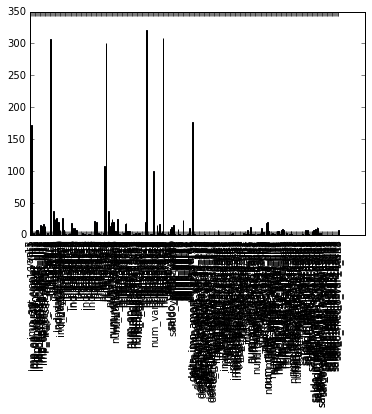

In [54]:
#predictors = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked", "FamilySize", "Title", "FamilyId"]
data = santander_train
# Perform feature selection

# all_zero_columns = data.apply(lambda x: np.var(x)==0)
# all_zero_column_labels = data.columns[all_zero_columns].values
# all_zero_column_labels

# non_zero_predictors = np.setdiff1d(predictors, all_zero_column_labels)

predictors = santander_train.columns.values[1:-1]

#predictors = ['num_var30_0', 'num_var42_0', 'ind_var5_0', 'num_var5_0', 'saldo_var46','var3', 'num_var1', 'num_var34']
predictors = ['num_var34', 'num_var1', 'var3', 'saldo_var46', 'num_var5_0', 'ind_var5_0', 'num_var42_0', 'num_var30_0']

selector = SelectKBest(f_classif, k=5)
selector.fit(data[predictors], data[target])

# Get the raw p-values for each feature, and transform from p-values into scores
scores = -np.log10(selector.pvalues_)

# Plot the scores.  See how "Pclass", "Sex", "Title", and "Fare" are the best?
plt.bar(range(len(predictors)), scores)
plt.xticks(range(len(predictors)), predictors, rotation='vertical')
plt.show()



In [55]:

score_pos = np.argsort(scores)[::-1]
print(scores[score_pos][36:44])
print( data.columns[score_pos[36:44][::-1]] )



scores_clean = scores[~np.isnan(scores)&~np.isinf(scores)]

[ 320.41635362  308.44219841  306.87154591  301.19027523  177.33376164
  171.88529425  107.94392497   99.26114674]
Index(['num_var34', 'num_var1', 'var3', 'saldo_var46', 'num_var5_0',
       'ind_var5_0', 'num_var42_0', 'num_var30_0'],
      dtype='object')


In [9]:
maybe_zero_features = [ 21 , 22,  56,  57,  58 , 59 , 80 , 84 , 85 ,131 ,132, 133, 134, 155, 161, 162 ,179, 180,
 189, 192, 220, 222, 234 ,238 ,244 ,248 ,261, 262 ,303 ,307 ,315 ,319 ,327, 349]
data[maybe_zero_features]

,ind_var1,ind_var2_0,ind_var25,ind_var27_0,ind_var28_0,ind_var28,ind_var41_0,ind_var44,ind_var46_0,num_op_var39_ult3,...,imp_trasp_var17_in_ult1,imp_trasp_var33_in_ult1,var21,num_var2_0_ult1,num_op_var39_efect_ult3,num_reemb_var17_ult1,num_trasp_var17_in_ult1,num_trasp_var33_in_ult1,num_var45_ult3,saldo_medio_var13_medio_hace2
0,0,0,0,0,0,0,1,0,0,0,...,0.0,0.0,0,0,0,0,0,0,0,0.0
1,0,0,0,0,0,0,1,0,0,0,...,0.0,0.0,0,0,0,0,0,0,0,0.0
2,0,0,0,0,0,0,1,0,0,0,...,0.0,0.0,0,0,0,0,0,0,0,0.0
3,0,0,0,0,0,0,1,0,0,9,...,0.0,0.0,0,0,0,0,0,0,48,0.0
4,0,0,0,0,0,0,1,0,0,0,...,0.0,0.0,0,0,0,0,0,0,0,0.0
5,0,0,0,0,0,0,1,0,0,0,...,0.0,0.0,0,0,0,0,0,0,0,0.0
6,0,0,0,0,0,0,1,0,0,0,...,0.0,0.0,0,0,0,0,0,0,0,0.0
7,0,0,0,0,0,0,1,0,0,0,...,0.0,0.0,0,0,0,0,0,0,0,0.0
8,0,0,0,0,0,0,1,0,0,0,...,0.0,0.0,0,0,0,0,0,0,0,0.0
9,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0,0,0,0,0,0,0,0.0


335

In [13]:
print( type(data[target_col].values),data[target_col].values.shape )
data_target = data[target_col].as_matrix().ravel()
print( type(data_target),data_target.shape )

<class 'numpy.ndarray'> (76020,)
<class 'numpy.ndarray'> (76020,)


In [15]:
# Pick only the four best features.
#predictors = ["Pclass", "Sex", "Fare", "Title"]

predictors = ['num_var34', 'num_var1', 'var3', 'saldo_var46', 'num_var5_0', 'ind_var5_0', 'num_var42_0', 'num_var30_0']

alg = RandomForestClassifier(random_state=1, n_estimators=150, min_samples_split=8, min_samples_leaf=4)
scores = cross_validation.cross_val_score(alg, data[predictors], data_target, cv=10)
# Take the mean of the scores (because we have one for each fold)
print(scores.mean())

0.960431468591


In [81]:


# algorithms = [
#     [GradientBoostingClassifier(random_state=1, n_estimators=25, max_depth=3), predictors],
#     [LogisticRegression(random_state=1), ["Pclass", "Sex", "Fare", "FamilySize", "Title", "Age", "Embarked"]]
# ]

# full_predictions = []

# Fit the algorithm using the full training data.
alg.fit(data[predictors], data_target)

# Predict using the test dataset.  We have to convert all the columns to floats to avoid an error.
predictions = alg.predict_proba(santander_test[predictors].astype(float))[:,1]
# full_predictions.append(predictions)

# The gradient boosting classifier generates better predictions, so we weight it higher.
# predictions = (full_predictions[0] * 3 + full_predictions[1]) / 4


# Map predictions to outcomes (only possible outcomes are 1 and 0)
predictions[predictions > .5] = 1
predictions[predictions <=.5] = 0

predictions=predictions.astype(int)

# Create a new dataframe with only the columns Kaggle wants from the dataset.
submission = pd.DataFrame({
        "ID": santander_test["ID"],
        "TARGET": predictions
    })
    
submission.to_csv("kaggle.csv", index=False)    